[[4.46889809 5.90667978 1.38478622]
 [3.09927695 5.30405954 2.3209606 ]
 [3.44281764 5.11395426 0.99109793]
 [5.21762681 6.12504462 2.14209642]
 [3.39231309 4.38125258 2.2296077 ]
 [4.17922036 5.27750262 1.21647092]
 [3.29865394 4.81421627 0.91167182]
 [3.21918076 4.37545948 0.76465526]
 [3.89394486 5.29712108 1.8362087 ]
 [3.7225563  5.39503405 1.17026502]
 [3.80873367 5.6514343  0.87217854]
 [2.42336189 4.2355949  1.42687711]
 [2.56114009 4.50456437 0.9877941 ]
 [4.36378394 6.01578135 1.68039192]
 [5.16457938 6.5676468  2.28049444]
 [3.38967951 4.62114913 0.71190392]
 [4.08916841 4.71464832 1.65078734]
 [3.4941009  4.48337688 1.23253607]
 [4.44645641 5.57366116 1.38461621]
 [3.59429682 4.82666877 0.70719589]
 [4.33613226 5.97443217 1.36978825]
 [2.40927967 4.06847858 1.30186114]
 [2.79509779 5.26489391 0.95175143]
 [1.71142751 4.60534803 1.56834522]
 [2.32615254 4.8196711  1.34223354]
 [4.61445561 5.49504492 4.00713252]
 [2.3887316  4.23447668 0.77508006]
 [1.77119321 4.05120413 2.24

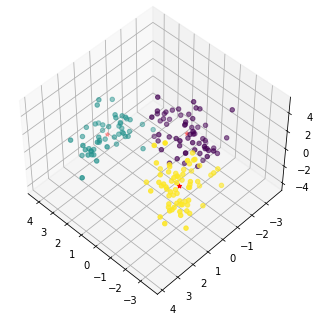

In [2]:
from pandas import read_csv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import metrics

# 导入数据
filename = 'data/wine.data'
names = ['class', 'Alcohol', 'MalicAcid', 'Ash', 'AlclinityOfAsh', 'Magnesium', 'TotalPhenols', 'Flavanoids',
         'NonflayanoidPhenols', 'Proanthocyanins', 'ColorIntensiyt', 'Hue', 'OD280/OD315', 'Proline']
dataset = read_csv(filename, names=names)
dataset['class'] = dataset['class'].replace(to_replace=[1, 2, 3], value=[0, 1, 2])
array = dataset.values
X = array[:, 1:13]
y = array[:, 0]

# 数据降维
pca = PCA(n_components=3)
X_scale = StandardScaler().fit_transform(X)
X_reduce = pca.fit_transform(scale(X_scale))

# 模型训练
model = KMeans(n_clusters=3)
model.fit(X_reduce)
labels = model.labels_
centers = model.cluster_centers_
print(model.transform(X_reduce))
#print(labels)

# 输出模型的准确度
print('%.3f   %.3f   %.3f   %.3f   %.3f    %.3f' %(
    metrics.homogeneity_score(y, labels),
    metrics.completeness_score(y, labels),
    metrics.v_measure_score(y, labels),
    metrics.adjusted_rand_score(y, labels),
    metrics.adjusted_mutual_info_score(y,  labels),
    # 轮廓到中心的距离
    metrics.silhouette_score(X_reduce, labels)))

# 绘制模型的分布图
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], X_reduce[:, 2], c=labels.astype(np.float))
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker='*', color='red')
plt.show()
